In [1]:
import numpy as np
import random
from PIL import Image

In [2]:
def generate_a_feature():
    """ Features are 6x6 images made with black and white pixels
    each feature has 18 black and 18 white pixels"""    
    whites = np.ones(18)
    blacks = np.zeros(18)
    feature = np.concatenate((whites, blacks))
    np.random.shuffle(feature)
    feature = feature.reshape(6, 6)
    feature = feature * 255
    PIL_image = Image.fromarray(feature.astype('uint8'), "L")
    return PIL_image

In [3]:
def generate_features(num_features=12):
    feature_vec = []
    feature_vec.append(generate_a_feature())

    while len(feature_vec) < num_features:
        feature = generate_a_feature()
        count = 0
        for f in feature_vec:
            if (np.array(feature) == np.array(f)).all():
                print("yes")
                count += 1
        if count == 0:
            feature_vec.append(feature)
    return feature_vec

In [4]:
def is_it(texture_to_check, textures_list):
    for i in range(len(textures_list)):
        if (np.array(texture_to_check) == np.array(textures_list[i])).all():
            print("yes")
            return True
    return False

In [6]:
def get_concat_h_repeat(features_list, all_list):
    size = 30
    dst = Image.new('RGB', (size*6, 6))
    rows_list = []
    features_counter = [150, 150, 150, 150, 150, 150, 20]
    for _ in range(size):
        for x in range(size):
            ind = random.randint(0, 5)
            while features_counter[ind] == 0:
                ind = random.randint(0, 5)
            if ind == 6:
                feature = generate_a_feature()
                while is_it(feature, all_list):
                    feature = generate_a_feature()
                dst.paste(feature, (x*6, 0))
                features_counter[ind] -= 1
            else:
                dst.paste(features_list[ind], (x*6, 0))
                features_counter[ind] -= 1
        rows_list.append(dst)
        dst = Image.new('RGB', (size*6, 6))
    random.shuffle(rows_list)
    return rows_list

In [7]:
def get_concat_v_repeat(rows_list):
    size2 = 30
    dst2 = Image.new('RGB', (size2*6, size2*6))

    for y in range(size2):
        dst2.paste(rows_list[y], (0, y * 6))

    return dst2

In [8]:
def get_concat_tile_repeat(features_list, all_list):
    dst_h = get_concat_h_repeat(features_list, all_list)
    return get_concat_v_repeat(dst_h)

In [9]:
def generate_textures(features_list, number_of_textures, all_list):
    textures_list = []
    i = 0
    while i != number_of_textures:
        single_texture = get_concat_tile_repeat(features_list, all_list)
        if is_it(single_texture, textures_list):
            print("yes")
        else:
            textures_list.append(single_texture)
            i += 1
    return textures_list

In [10]:
features_list = generate_features(12)

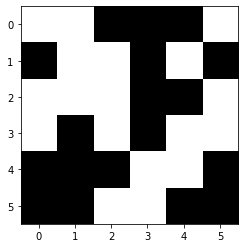

In [14]:
import matplotlib.pyplot as plt
plt.imshow(features_list[1], cmap = "gray")

In [11]:
textures_kalamites = generate_textures(features_list[:6], 500, features_list)

In [16]:
textures_lakamites = generate_textures(features_list[6:], 500, features_list)

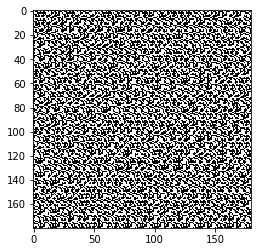

In [17]:
plt.imshow(textures_kalamites[0])

In [ ]:
# Save kalamites textures
for i in range(len(textures_kalamites)):
    textures_kalamites[i].save("KalamitesTextures{}.png".format(i+1))

In [ ]:
# Save lakamites features
for i in range(len(textures_lakamites)):
    textures_lakamites[i].save("LakamitesTextures{}.png".format(i+1))

In [ ]:
# Save features
for i in range(len(features_list)//2):
    features_list[i].save("Kalamites{}.png".format(i+1))

for i in range(len(features_list)//2, len(features_list)):
    features_list[i].save("Lakamites{}.png".format(i+1))